# **PLOTS CATEGÓRICOS COM SEABORN**

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**DISPLOT**

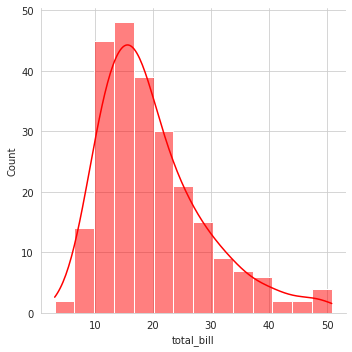

In [4]:
# Plot de distribuição
sns.set_style('whitegrid')
sns.displot(tips['total_bill'], kde=True, color='red')


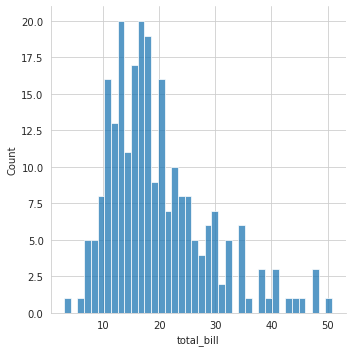

In [5]:
# Plot de distribuição, com kde=False, sóó vemos um histograma,e bin= 40, para uma melhor visualização dos dados
sns.displot(tips['total_bill'], kde=False, bins=40)

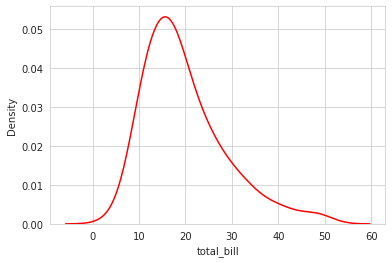

In [6]:
sns.kdeplot(tips['total_bill'], color='red')

**JOINTPLOT**

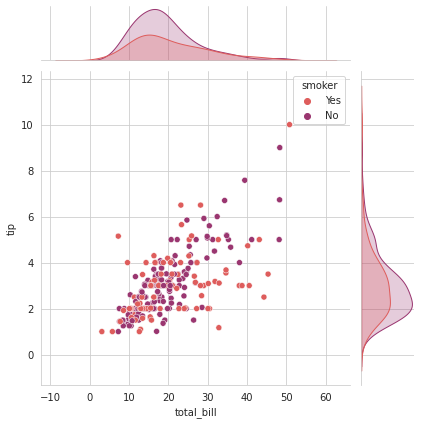

In [7]:
# Jointplot
sns.jointplot(x='total_bill', y='tip', data=tips, hue='smoker', palette="flare")

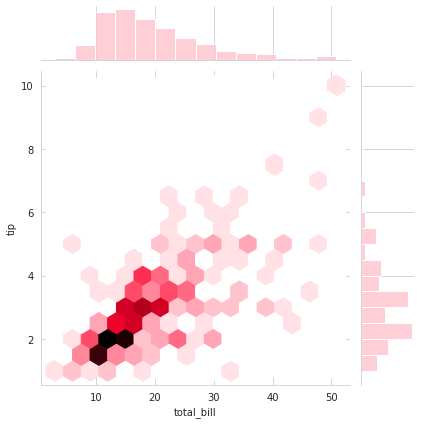

In [8]:
# Jointplot com kind='hex'
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex', color='pink')

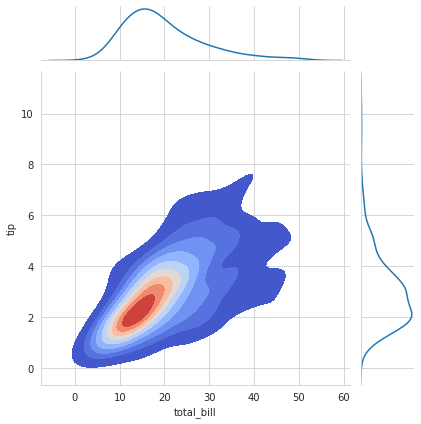

In [32]:
# Jointplot com kind='kde'
sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde', cmap='coolwarm', shade=True)

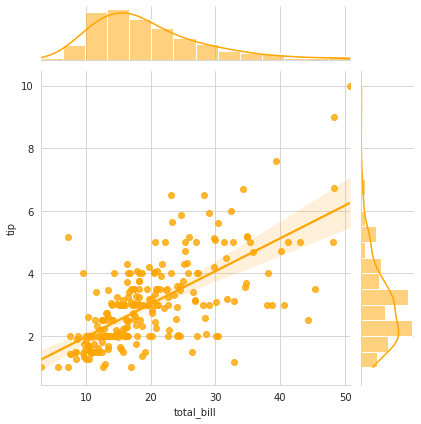

In [10]:
# Jointplot com kind='reg', regressao linear
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg', color='orange')

**PAIRPLOT**

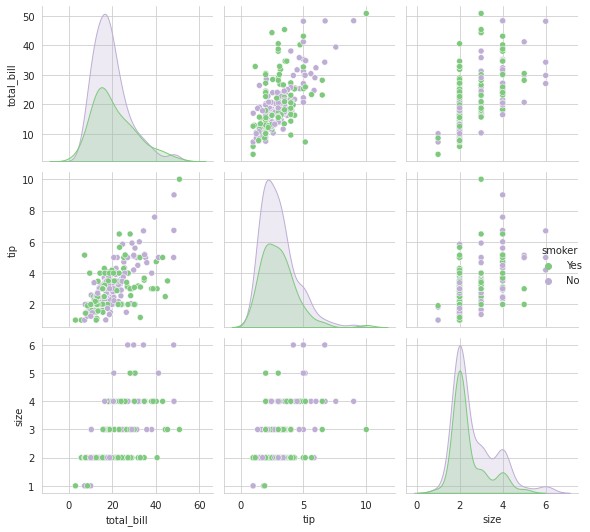

In [11]:
# Filtrados por fumante ou não fumante
sns.pairplot(tips, hue='smoker', palette='Accent')
plt.tight_layout()

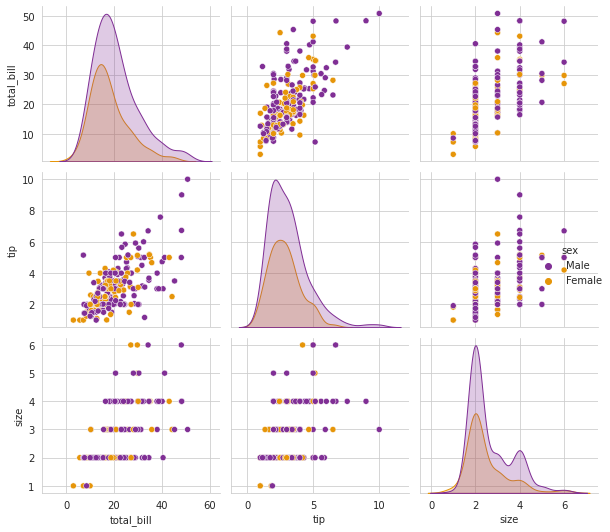

In [12]:
# Filtrados por sexo (M ou F)
sns.pairplot(tips, hue='sex', palette='CMRmap')
plt.tight_layout()

**RUGPLOT**

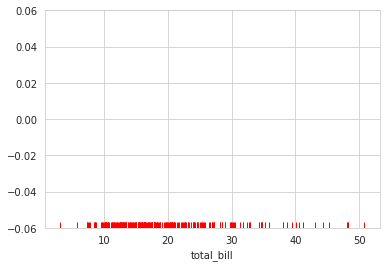

In [13]:
sns.rugplot(tips['total_bill'], color='red')

**BARPLOTS**

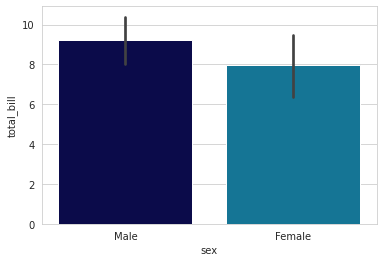

In [14]:
# Import do numpy para usar a função std(desvio padrao)
import numpy as np
sns.barplot(x='sex', y='total_bill', data=tips, estimator=np.std, palette='ocean')

**COUNTPLOT**

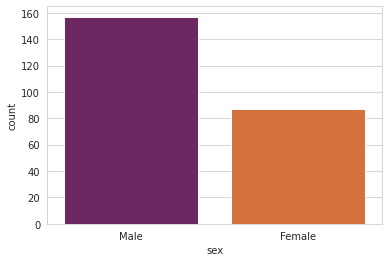

In [15]:
# Parecido com o Barplot, exceto porque o "estimator=" recebe por padrao o count dos valores:
sns.countplot(x='sex', data=tips, palette='inferno')

**BOXPLOT**

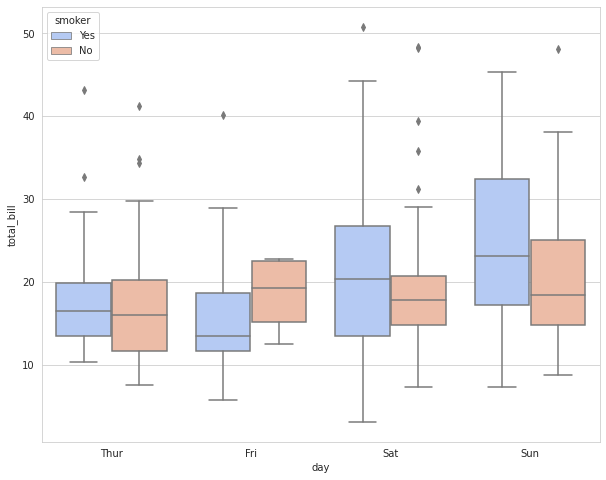

In [16]:
# Mudar o tamanho da figura:
plt.figure(figsize=(10, 8))
sns.boxplot(x='day', y='total_bill', data=tips, palette='coolwarm',hue='smoker')

**VIOLIN PLOT**

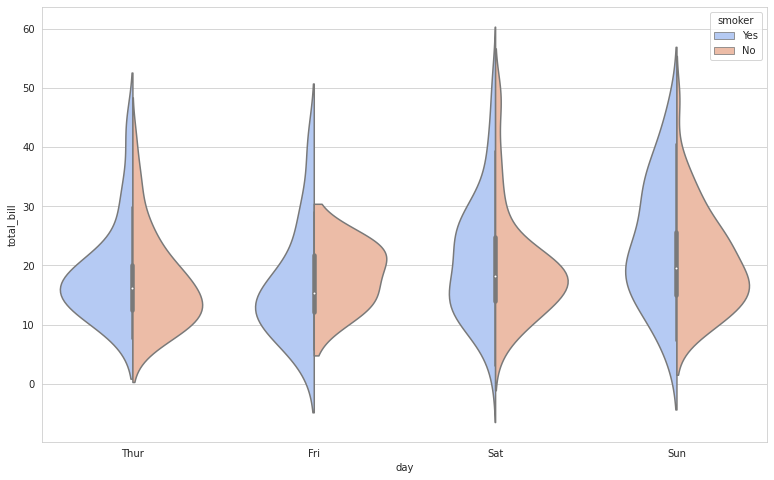

In [17]:
plt.figure(figsize=(13, 8))

sns.violinplot(x='day', y='total_bill', data=tips, hue='smoker', palette='coolwarm', split=True)

**STRIP PLOT**

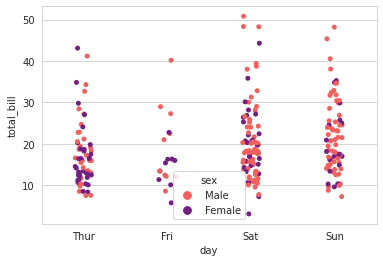

In [18]:
# Sem jitter=True / split=True
sns.stripplot(x='day', y='total_bill', data=tips, hue='sex',palette='magma_r')

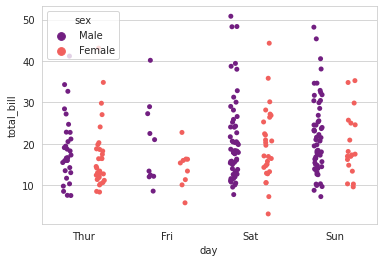

In [33]:
# Com jitter=True e split=True
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True, hue='sex', dodge=True, palette='magma')

**SWARM PLOT**

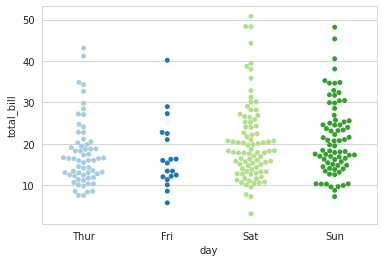

In [20]:
# Uma espécie de combinação do stripplot com o violinplot (mais fácil para entender visualizar os dados, mas nao conjuntos muito grandes)
sns.swarmplot(x='day', y='total_bill', data=tips, palette='Paired')

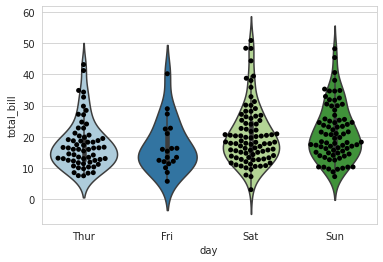

In [21]:
# Combinação do violinplot e swarmplot:
sns.violinplot(x='day', y='total_bill', data=tips, palette='Paired')
sns.swarmplot(x='day', y='total_bill', data=tips, color='black')

**CAT PLOT**

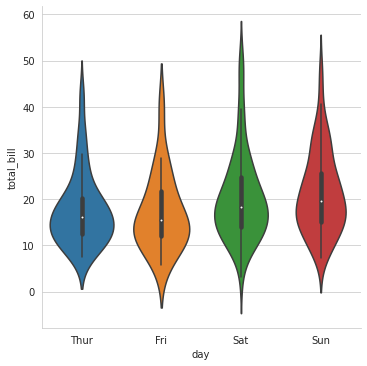

In [22]:
# Especificar o tipo de plot desejado, no exmeplo: violin plot
sns.catplot(x='day', y='total_bill', data=tips, kind='violin')

# **PLOTS MATRICIAIS COM SEABORN**

In [23]:
# Import de mais um data set para auxiliar nos estudos de visualização
flights = sns.load_dataset('flights')

In [24]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [25]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [26]:
# Extraindo a matrix de correlação para gerar um heatmap 
cor = tips.corr()
cor

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


**HEATMAP**

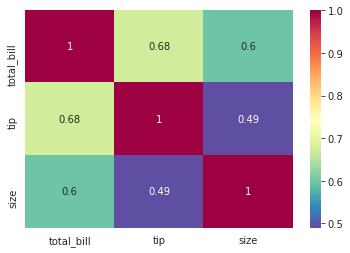

In [27]:
sns.heatmap(cor, annot=True, cmap='Spectral_r')

In [28]:
# Tranformando o data set em uma Pivot table para analisa-lo com heat map

fp = flights.pivot_table(index='month', columns='year', values='passengers')
fp

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


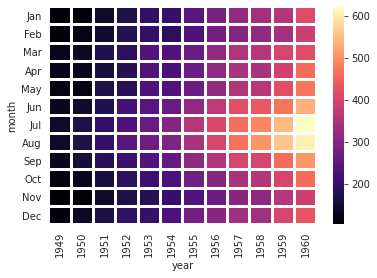

In [29]:
#Heatmap da tabela acima:
sns.heatmap(fp, cmap='magma', linecolor='white', linewidths=2)

**CLUSTER MAP**

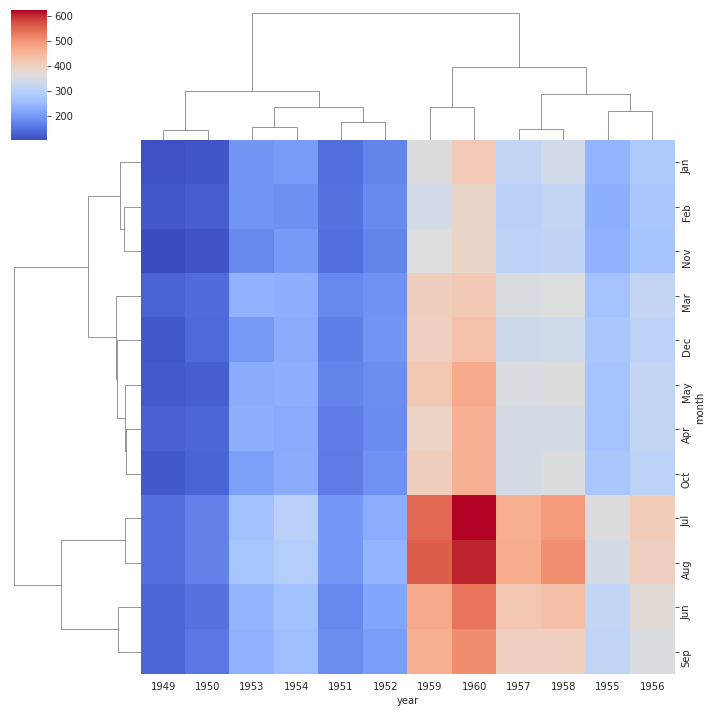

In [30]:
sns.clustermap(fp, cmap='coolwarm')

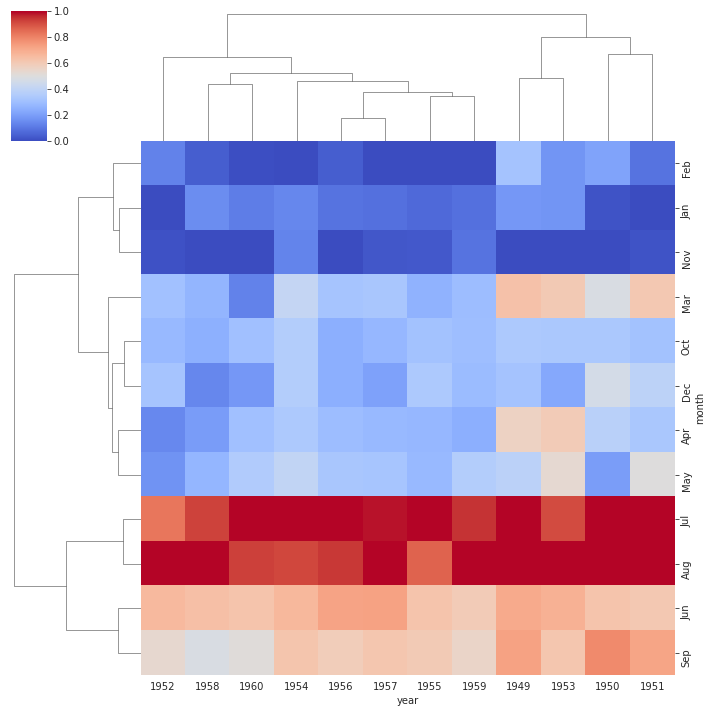

In [31]:
# Para normalizar a escala: standard_scale=1
sns.clustermap(fp, cmap='coolwarm', standard_scale=1)